In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-zs-LIAF)

We'll measure the error at the time $t=1$.

In [2]:
du_dt = lambda t, u: u
u_exact = exp
a, b = (0.0, 1.0)

def LIAF(du_dt, tspan, u0, n):
    a, b = tspan
    h = (b - a) / n
    t = linspace(a, b, n+1)
    u = np.tile(np.array(u0), (n+1, 1))
    u[1] = u_exact(t[1])    # use an exact starting value
    f = copy(u)
    f[0] = du_dt(t[0], u[0])
    for i in range(n):
        f[i] = du_dt(t[i], u[i])
        u[i + 1] = -4 * u[i] + 5 * u[i-1] + h * (4 * f[i] + 2 * f[i-1])

    return t, u.T

n = [5, 10, 20, 40, 60]
results = PrettyTable(["n", "error"])
for j in range(5):
    t, u = LIAF(du_dt, [a, b], [1.0], n[j])
    err = abs(u_exact(b) - u[0, -1])
    results.add_row([n[j], err])
print(results)

+----+------------------------+
| n  |         error          |
+----+------------------------+
| 5  |    293.502838171541    |
| 10 |   452905.58324991807   |
| 20 |   2196838145485.221    |
| 40 | 1.0437865522698013e+26 |
| 60 | 6.628042953187168e+39  |
+----+------------------------+


There is no convergence in sight! A graph of the last numerical attempt yields a clue:

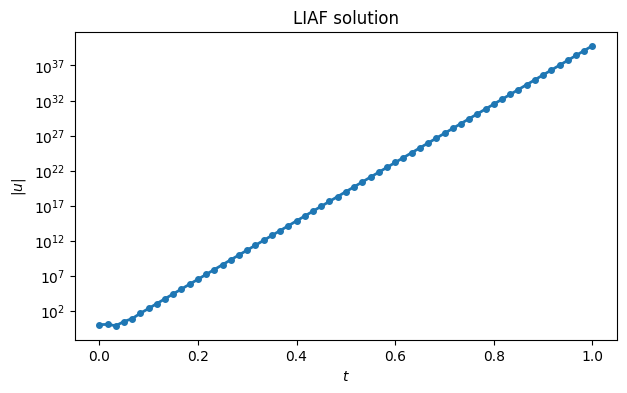

In [3]:
semilogy(t, abs(u[0]), "-o")
xlabel("$t$"), ylabel("$|u|$")
title(("LIAF solution"));

It's clear that the solution is growing exponentially in time.